In [67]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings

In [8]:
h=pd.read_csv('../DataSets/healthcare-dataset-stroke-data.csv')

In [9]:
h

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [10]:
#information of data
h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [11]:
#value count on heart disease
h.heart_disease.value_counts()

heart_disease
0    4834
1     276
Name: count, dtype: int64

In [12]:
h.work_type.value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [68]:
h.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

#fill nan value with 0
h.fillna(0,inplace=True)
h.isnull().sum()

In [15]:
#change the data type float conver into int64
h['age']=h['age'].astype('int64')

In [16]:
h

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,0.0,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80,1,0,Yes,Private,Urban,83.75,0.0,never smoked,0
5106,44873,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [17]:
h.dtypes

id                     int64
gender                object
age                    int64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [18]:
h.age.astype('int64')

0       67
1       61
2       80
3       49
4       79
        ..
5105    80
5106    81
5107    35
5108    51
5109    44
Name: age, Length: 5110, dtype: int64

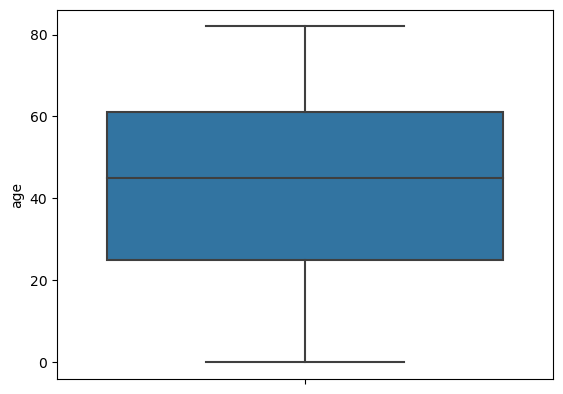

In [19]:
#out
sb.boxplot(y=h.age)
Q1=h['age'].quantile(0.25)
Q3=h['age'].quantile(0.75)
IQR=Q3-Q1

outliers_age=h[~((h['age']>=Q1-1.5*IQR))]

<Axes: ylabel='avg_glucose_level'>

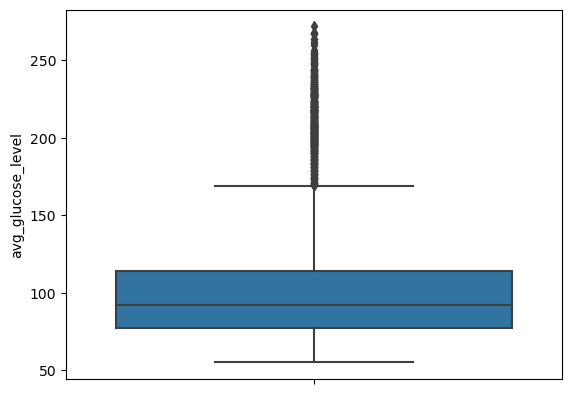

In [20]:
sb.boxplot(y=h.avg_glucose_level)

<Axes: ylabel='bmi'>

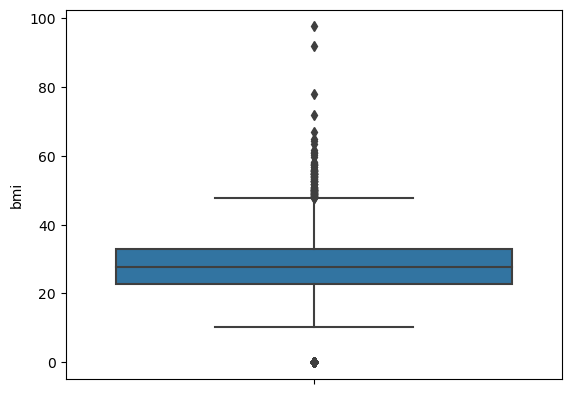

In [21]:
sb.boxplot(y=h.bmi)

In [22]:
pd.get_dummies(h.gender)

,Female,Male,Other
0,False,True,False
1,True,False,False
2,False,True,False
3,True,False,False
4,True,False,False
...,...,...,...
5105,True,False,False
5106,True,False,False
5107,True,False,False
5108,False,True,False


In [23]:
pd.get_dummies(h.smoking_status)

,Unknown,formerly smoked,never smoked,smokes
0,False,True,False,False
1,False,False,True,False
2,False,False,True,False
3,False,False,False,True
4,False,False,True,False
...,...,...,...,...
5105,False,False,True,False
5106,False,False,True,False
5107,False,False,True,False
5108,False,True,False,False


In [24]:
pd.get_dummies(h.work_type)

,Govt_job,Never_worked,Private,Self-employed,children
0,False,False,True,False,False
1,False,False,False,True,False
2,False,False,True,False,False
3,False,False,True,False,False
4,False,False,False,True,False
...,...,...,...,...,...
5105,False,False,True,False,False
5106,False,False,False,True,False
5107,False,False,False,True,False
5108,False,False,True,False,False


In [25]:
h.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.215264,0.097456,0.054012,106.147677,27.756732,0.048728
std,21161.721625,22.633866,0.296607,0.226063,45.283560,9.529497,0.215320
min,67.000000,0.000000,0.000000,0.000000,55.120000,0.000000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,22.900000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,27.700000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


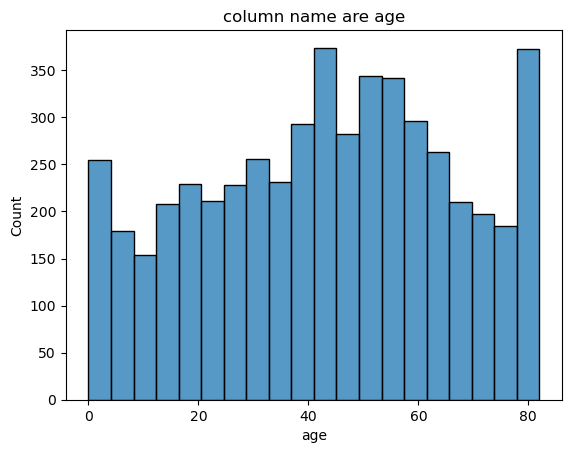

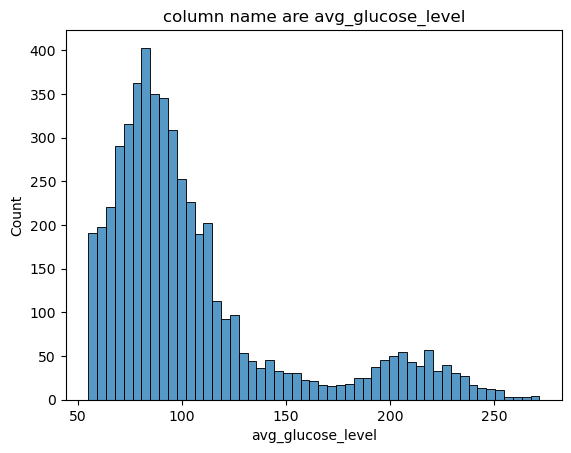

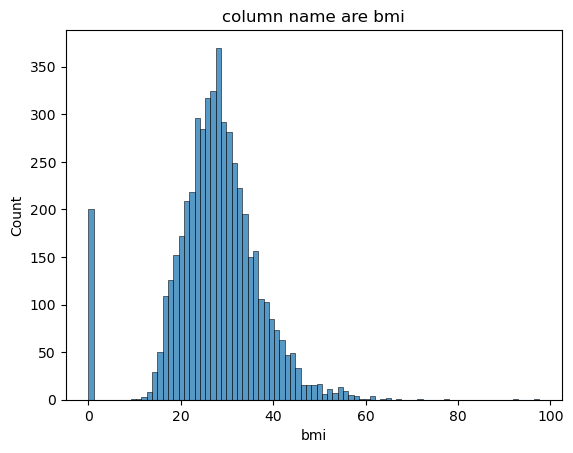

In [26]:
for i in ('age','avg_glucose_level','bmi'):
    sb.histplot(h[i])
    plt.title('column name are %s'%i)
    plt.show()

<Axes: xlabel='avg_glucose_level', ylabel='Density'>

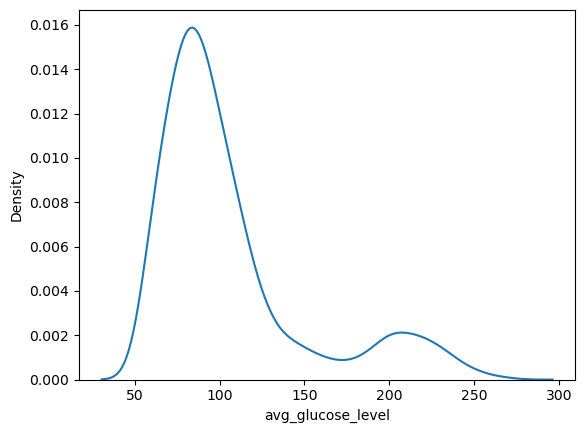

In [27]:
sb.kdeplot(h.avg_glucose_level)

<Axes: xlabel='smoking_status', ylabel='count'>

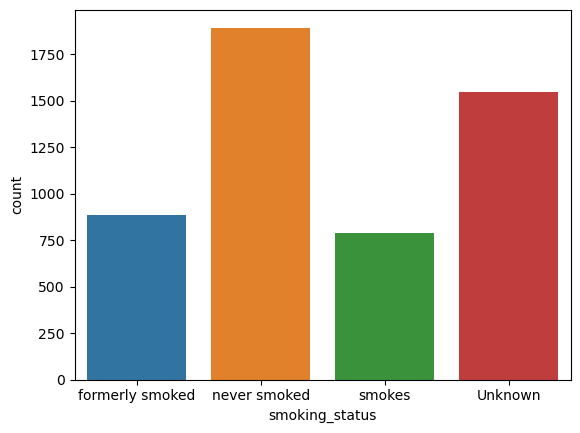

In [28]:
sb.countplot(x=h.smoking_status)

<Axes: xlabel='work_type', ylabel='count'>

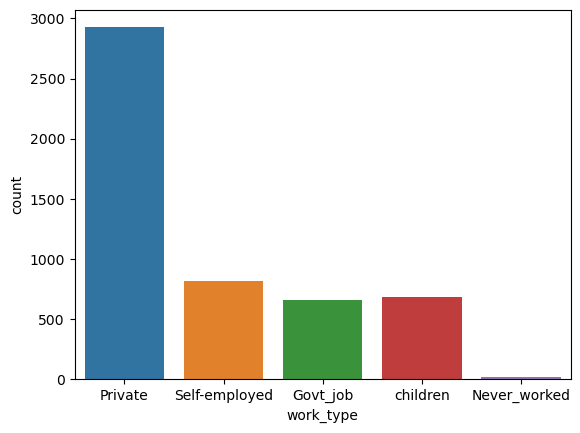

In [29]:
sb.countplot(x=h.work_type)

In [30]:
h.groupby('gender')['age'].mean()

gender
Female    43.748497
Male      42.468558
Other     26.000000
Name: age, dtype: float64

In [31]:
h.groupby('gender')['work_type'].count()

gender
Female    2994
Male      2115
Other        1
Name: work_type, dtype: int64

In [32]:
h.groupby('Residence_type')['avg_glucose_level'].mean()

Residence_type
Rural    106.375235
Urban    105.927307
Name: avg_glucose_level, dtype: float64

In [33]:
h.groupby('Residence_type')['avg_glucose_level'].std()

Residence_type
Rural    45.218348
Urban    45.354246
Name: avg_glucose_level, dtype: float64

In [34]:
h.groupby('Residence_type')['bmi'].mean()

Residence_type
Rural    27.802347
Urban    27.712558
Name: bmi, dtype: float64

In [35]:
h.groupby('Residence_type')['bmi'].std()

Residence_type
Rural    9.523344
Urban    9.537079
Name: bmi, dtype: float64

In [36]:
h.groupby('hypertension')['stroke'].sum()

hypertension
0    183
1     66
Name: stroke, dtype: int64

In [37]:
h.groupby('heart_disease')['stroke'].mean()

heart_disease
0    0.041787
1    0.170290
Name: stroke, dtype: float64

In [38]:
h.groupby('heart_disease')[['age','stroke']].mean()

,age,stroke
heart_disease,,
0,41.789408,0.041787
1,68.188406,0.170290


In [39]:
h.groupby('work_type')['avg_glucose_level'].mean()

work_type
Govt_job         107.779772
Never_worked      96.042727
Private          106.796844
Self-employed    112.645446
children          94.400277
Name: avg_glucose_level, dtype: float64

In [40]:
h.groupby('work_type')['age'].max()

work_type
Govt_job         82
Never_worked     23
Private          82
Self-employed    82
children         16
Name: age, dtype: int64

In [41]:
h.groupby('work_type')['stroke'].count()

work_type
Govt_job          657
Never_worked       22
Private          2925
Self-employed     819
children          687
Name: stroke, dtype: int64

In [42]:
pd.crosstab(index=h.gender,columns=h.work_type,margins=True,margins_name='stroke').count()

work_type
Govt_job         4
Never_worked     4
Private          4
Self-employed    4
children         4
stroke           4
dtype: int64

In [43]:
pd.crosstab(index=h.Residence_type,columns=h.smoking_status,margins=True,margins_name='stroke')

smoking_status,Unknown,formerly smoked,never smoked,smokes,stroke
Residence_type,,,,,
Rural,762,428,961,363,2514
Urban,782,457,931,426,2596
stroke,1544,885,1892,789,5110


In [44]:
pd.crosstab(index=[h['hypertension'],h['heart_disease']],columns=h['stroke'],values=h['age'],aggfunc='mean')

stroke                              0          1
hypertension heart_disease                      
0            0              38.985650  65.778523
             1              66.707865  71.441176
1            0              59.824147  69.584906
             1              70.019608  72.769231

In [45]:
pd.crosstab(index=h.ever_married,columns=h.work_type,margins=True)

work_type,Govt_job,Never_worked,Private,Self-employed,children,All
ever_married,,,,,,
No,117,22,821,110,687,1757
Yes,540,0,2104,709,0,3353
All,657,22,2925,819,687,5110


In [46]:
pd.crosstab(index=h.gender,columns=h.Residence_type,values=h.stroke,aggfunc=sum)

Residence_type,Rural,Urban
gender,,
Female,64.0,77.0
Male,50.0,58.0
Other,0.0,NaN


In [47]:
pd.crosstab(index=h.work_type,columns=h.smoking_status,values=h.bmi,aggfunc=sum)

smoking_status,Unknown,formerly smoked,never smoked,smokes
work_type,,,,
Govt_job,3462.9,3945.7,8327.4,3492.9
Never_worked,176.3,NaN,385.7,NaN
Private,18230.7,15521.7,35934.3,15499.6
Self-employed,4313.6,6025.5,9602.9,3472.2
children,11879.7,242.5,1277.4,45.9


In [48]:
pd.pivot_table(h,index='gender',columns='Residence_type',values='avg_glucose_level',aggfunc='mean')

Residence_type,Rural,Urban
gender,,
Female,104.05686,104.058718
Male,109.58083,108.604977
Other,143.33000,NaN


In [49]:
pd.pivot_table(h,index='work_type',columns='hypertension',values='stroke',aggfunc='count')

hypertension,0,1
work_type,,
Govt_job,584.0,73.0
Never_worked,22.0,NaN
Private,2644.0,281.0
Self-employed,675.0,144.0
children,687.0,NaN


In [50]:
pd.pivot_table(h,index='smoking_status',columns='ever_married',values='age',aggfunc=['mean','median'])

mean            median    
ever_married            No        Yes     No Yes
smoking_status                                  
Unknown          13.148724  54.074650      9  53
formerly smoked  36.034014  58.693767     30  59
never smoked     29.320755  53.524963     23  53
smokes           33.167598  51.183607     28  51

In [51]:
pd.pivot_table(h,index='work_type',columns='gender',values='bmi',aggfunc=['mean','min','max'])

mean                     min                max        \
gender            Female       Male Other Female  Male Other Female  Male   
work_type                                                                   
Govt_job       29.199499  29.373256   NaN    0.0   0.0   NaN   57.2  57.7   
Never_worked   26.054545  25.036364   NaN   20.4  14.6   NaN   44.9  41.8   
Private        29.451311  28.637863  22.4    0.0   0.0  22.4   78.0  97.6   
Self-employed  28.156944  29.279683   NaN    0.0   0.0   NaN   56.0  64.8   
children       19.685890  19.467867   NaN    0.0   0.0   NaN   41.7  38.7   

                     
gender        Other  
work_type            
Govt_job        NaN  
Never_worked    NaN  
Private        22.4  
Self-employed   NaN  
children        NaN

In [52]:
pd.pivot_table(h,index='smoking_status',columns='gender',values='avg_glucose_level',aggfunc=['mean','count'],margins=True)

mean                                   count          \
gender               Female        Male   Other         All  Female    Male   
smoking_status                                                                
Unknown           98.049306  101.434407     NaN   99.601541   836.0   708.0   
formerly smoked  104.599874  122.522629  143.33  112.886079   477.0   407.0   
never smoked     106.793263  108.975852     NaN  107.558092  1229.0   663.0   
smokes           107.161062  109.166053     NaN  108.017440   452.0   337.0   
All              104.057809  109.088520  143.33  106.147677  2994.0  2115.0   

                             
gender          Other   All  
smoking_status               
Unknown           NaN  1544  
formerly smoked   1.0   885  
never smoked      NaN  1892  
smokes            NaN   789  
All               1.0  5110

In [53]:
pd.pivot_table(h,index='Residence_type',columns=['ever_married','stroke'],values='bmi',aggfunc='mean')

ever_married          No                   Yes           
stroke                 0          1          0          1
Residence_type                                           
Rural           24.51169  26.450000  29.758919  26.374528
Urban           24.45000  22.695238  29.715592  25.303509

In [54]:
pd.pivot_table(h,index='hypertension',columns='heart_disease',values=['stroke','age'],aggfunc='mean',margins=True)

age                          stroke                    
heart_disease          0          1        All         0         1       All
hypertension                                                                
0              39.892955  67.466981  41.160451  0.033864  0.160377  0.039679
1              61.016129  70.578125  62.244980  0.122120  0.203125  0.132530
All            41.789408  68.188406  43.215264  0.041787  0.170290  0.048728

<Axes: xlabel='work_type', ylabel='age'>

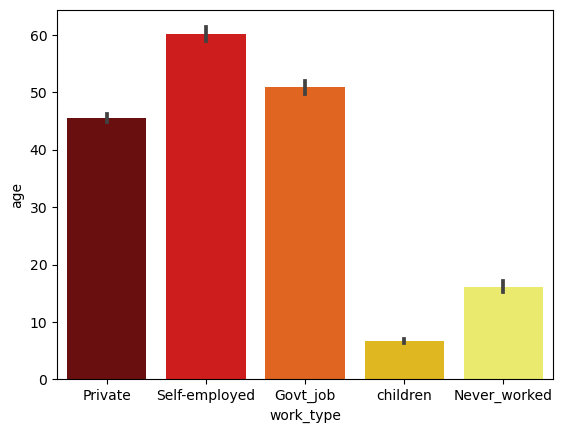

In [55]:
sb.barplot(x=h.work_type,y=h.age,palette='hot')

<Axes: xlabel='Residence_type', ylabel='stroke'>

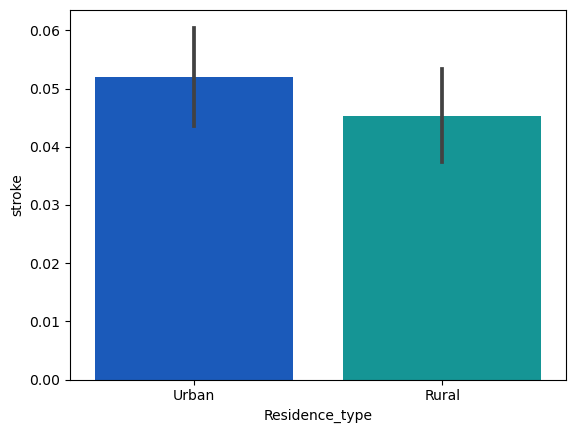

In [56]:
sb.barplot(x=h.Residence_type,y=h.stroke,palette='winter')

Text(0, 0.5, 'BMI')

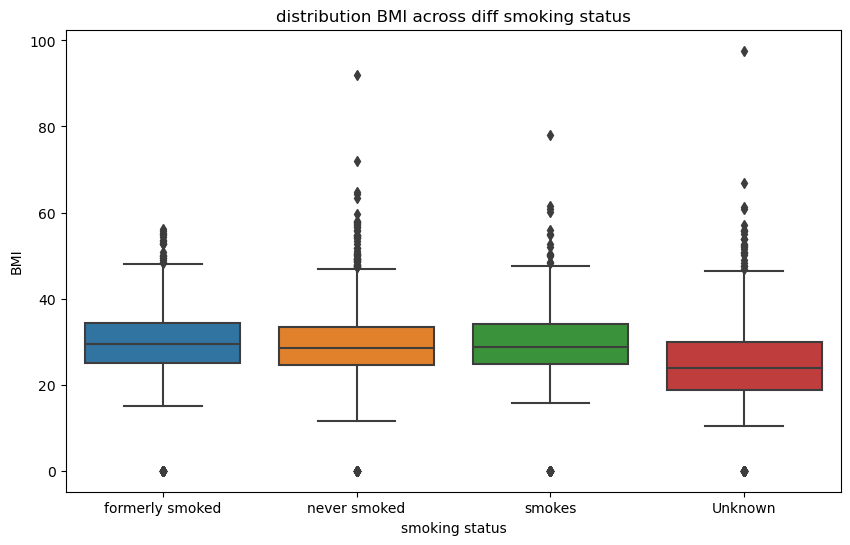

In [57]:
plt.figure(figsize=(10,6))
sb.boxplot(x='smoking_status',y='bmi',data=h)
plt.title('distribution BMI across diff smoking status')
plt.xlabel('smoking status')
plt.ylabel('BMI')

<Axes: xlabel='hypertension', ylabel='avg_glucose_level'>

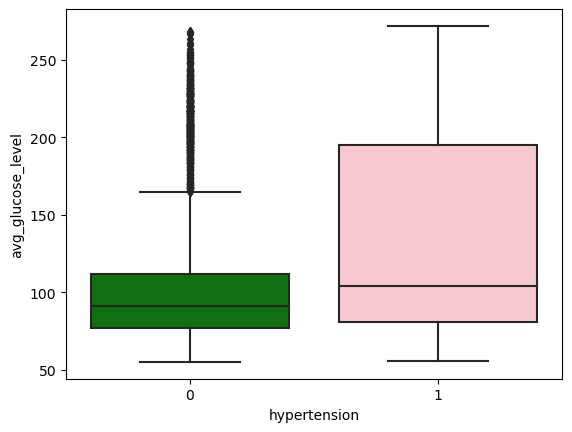

In [58]:
sb.boxplot(x=h.hypertension,y=h.avg_glucose_level,palette=['green','pink'])

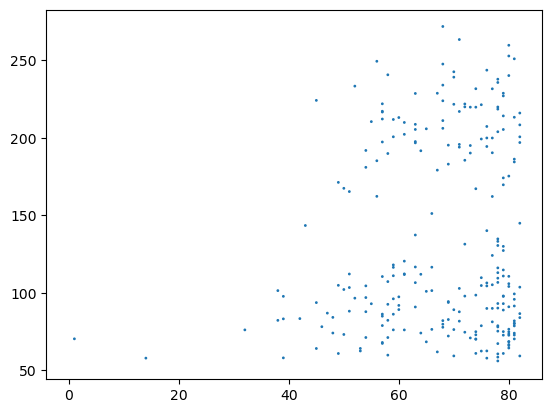

In [59]:
plt.scatter(h.age,h.avg_glucose_level,h.stroke)
plt.show()

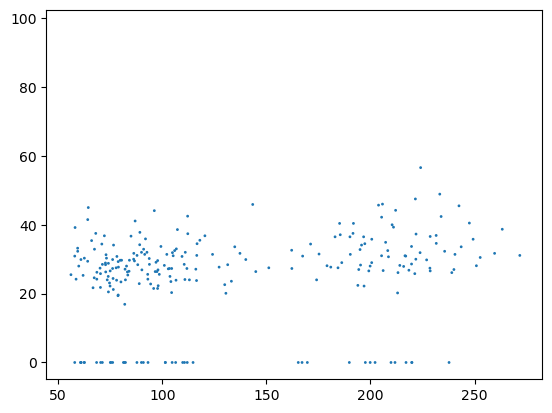

In [60]:
plt.scatter(h.avg_glucose_level,h.bmi,h.stroke)

C:\Users\acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

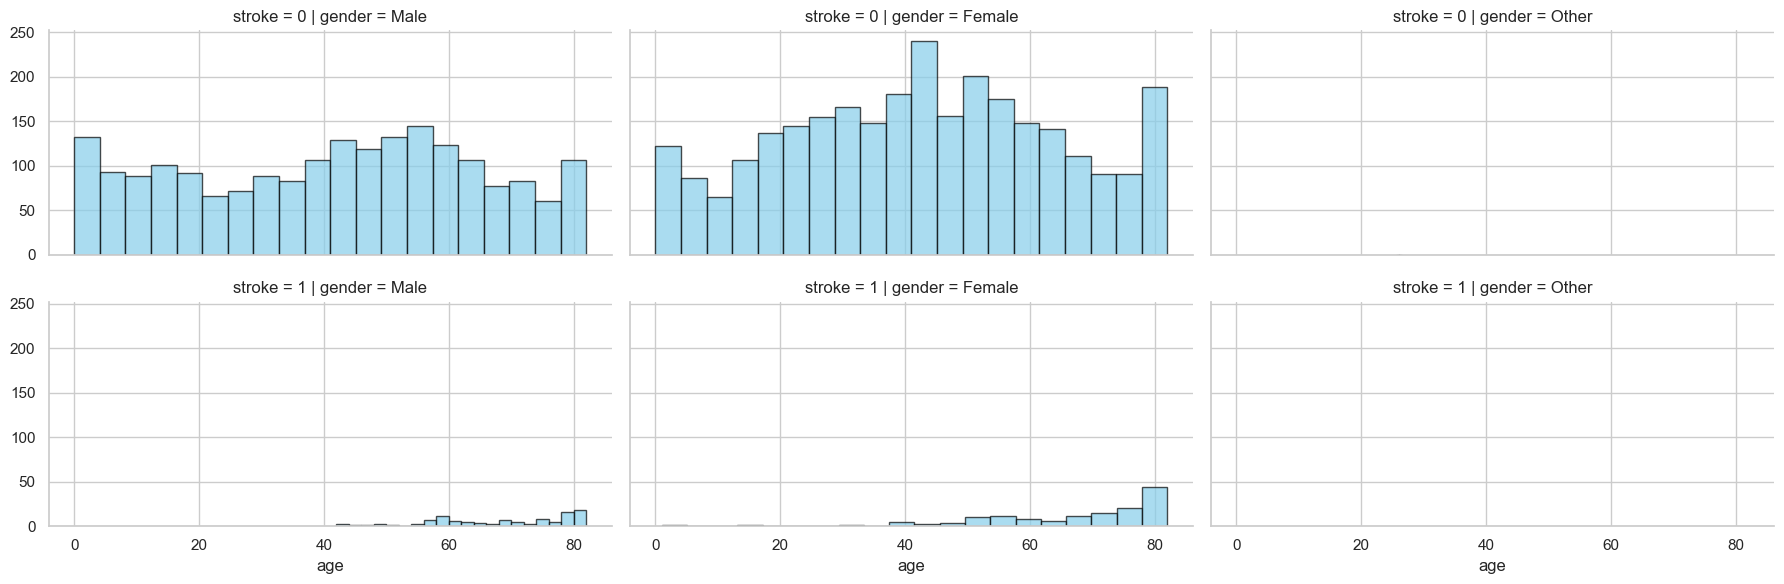

In [61]:
plt.figure(figsize=(12,8))
sb.set(style='whitegrid')
g=sb.FacetGrid(h,col='gender',row='stroke',aspect=2)
g.map(plt.hist,'age',bins=20,alpha=0.7,color='skyblue',edgecolor='black')

C:\Users\acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

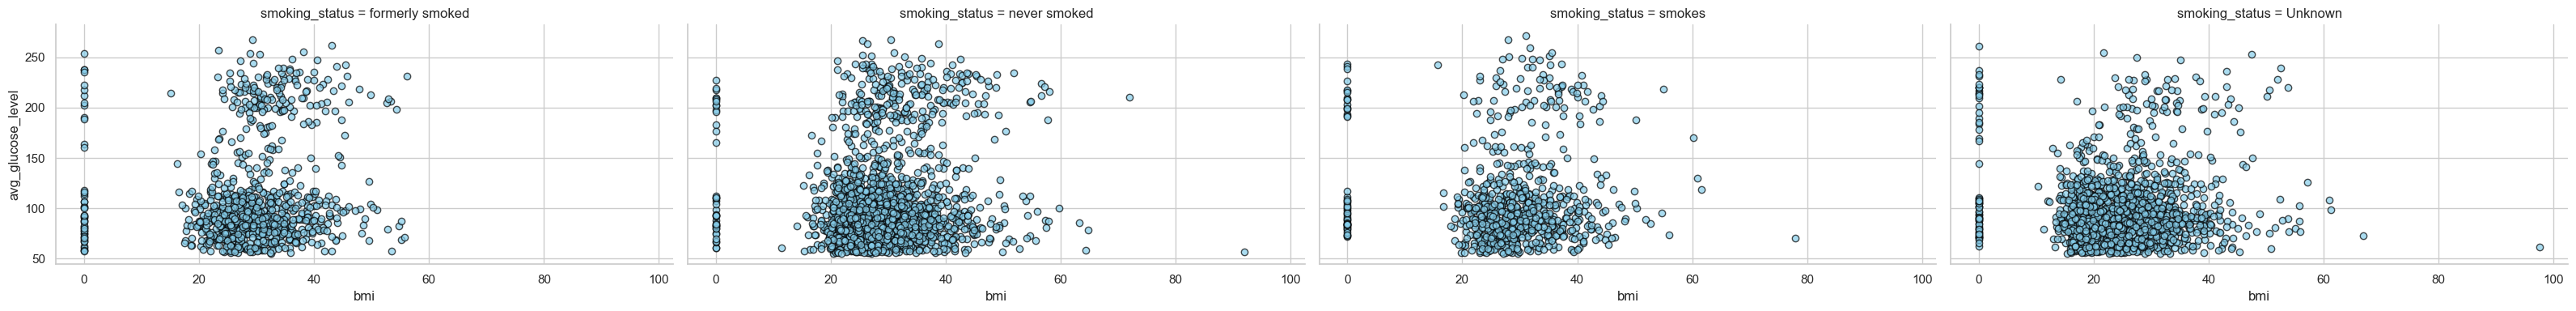

In [62]:
plt.figure(figsize=(8,6))
sb.set(style='whitegrid')
g=sb.FacetGrid(h,col='smoking_status',height=4,aspect=2)
g.map(plt.scatter,'bmi','avg_glucose_level',alpha=0.7,color='skyblue',edgecolor='black')

In [63]:
num=['age','avg_glucose_level','bmi']
corr=h[num].corr()

Text(42.10937499999999, 0.5, 'variable')

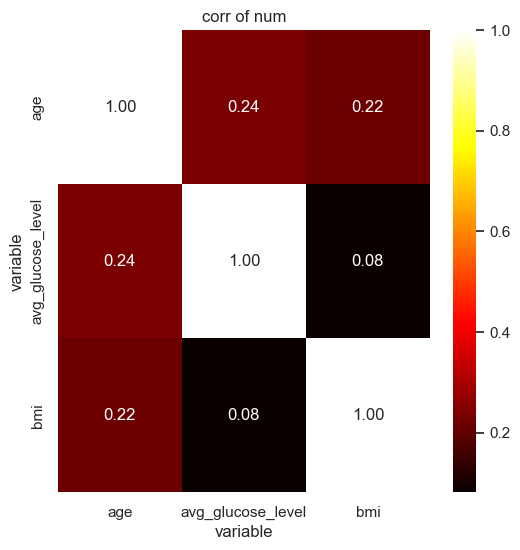

In [64]:
plt.figure(figsize=(6,6))
heatmap = sb.heatmap(corr,annot=True,cmap='hot',fmt='.2f')
heatmap.set_title('corr of num')
heatmap.set_xlabel('variable')
heatmap.set_ylabel('variable')

In [65]:
avg_age=h.groupby(['work_type','Residence_type'])['age'].mean().reset_index()
pivoted=avg_age.pivot(index='work_type',columns='Residence_type',values='age')

Text(29.609374999999993, 0.5, 'work type')

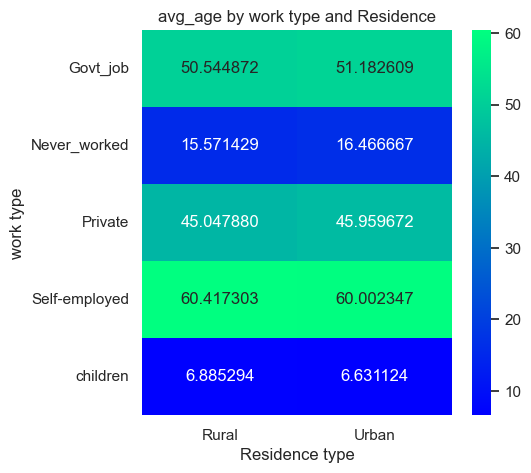

In [66]:
plt.figure(figsize=(5,5))
heatmap=sb.heatmap(pivoted,annot=True,cmap='winter',fmt='2f')
heatmap.set_title('avg_age by work type and Residence')
heatmap.set_xlabel('Residence type')
heatmap.set_ylabel('work type')


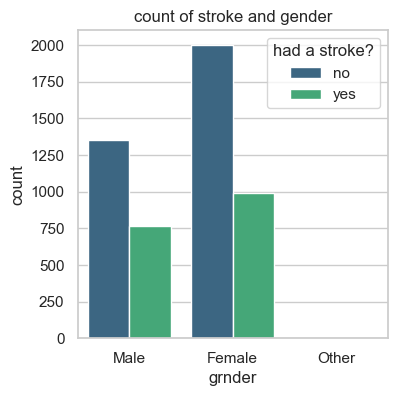

In [60]:
plt.figure(figsize=(4,4))
sb.countplot(h,x='gender',hue='ever_married',palette='viridis')
plt.title('count of stroke and gender')
plt.xlabel('grnder')
plt.ylabel('count')
plt.legend(title='had a stroke?',loc='upper right',labels=['no','yes'])

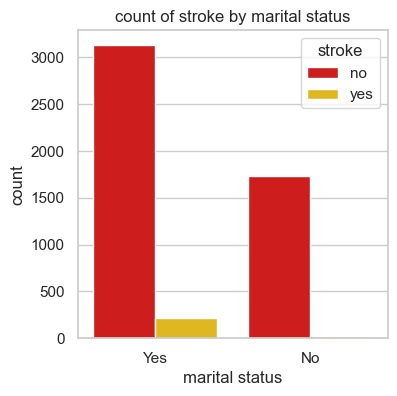

In [61]:
plt.figure(figsize=(4,4))
sb.countplot(h,x='ever_married',hue='stroke',palette='hot')
plt.title('count of stroke by marital status')
plt.xlabel('marital status')
plt.ylabel('count')
plt.legend(title='stroke',loc='upper right',labels=['no','yes'])

C:\Users\acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


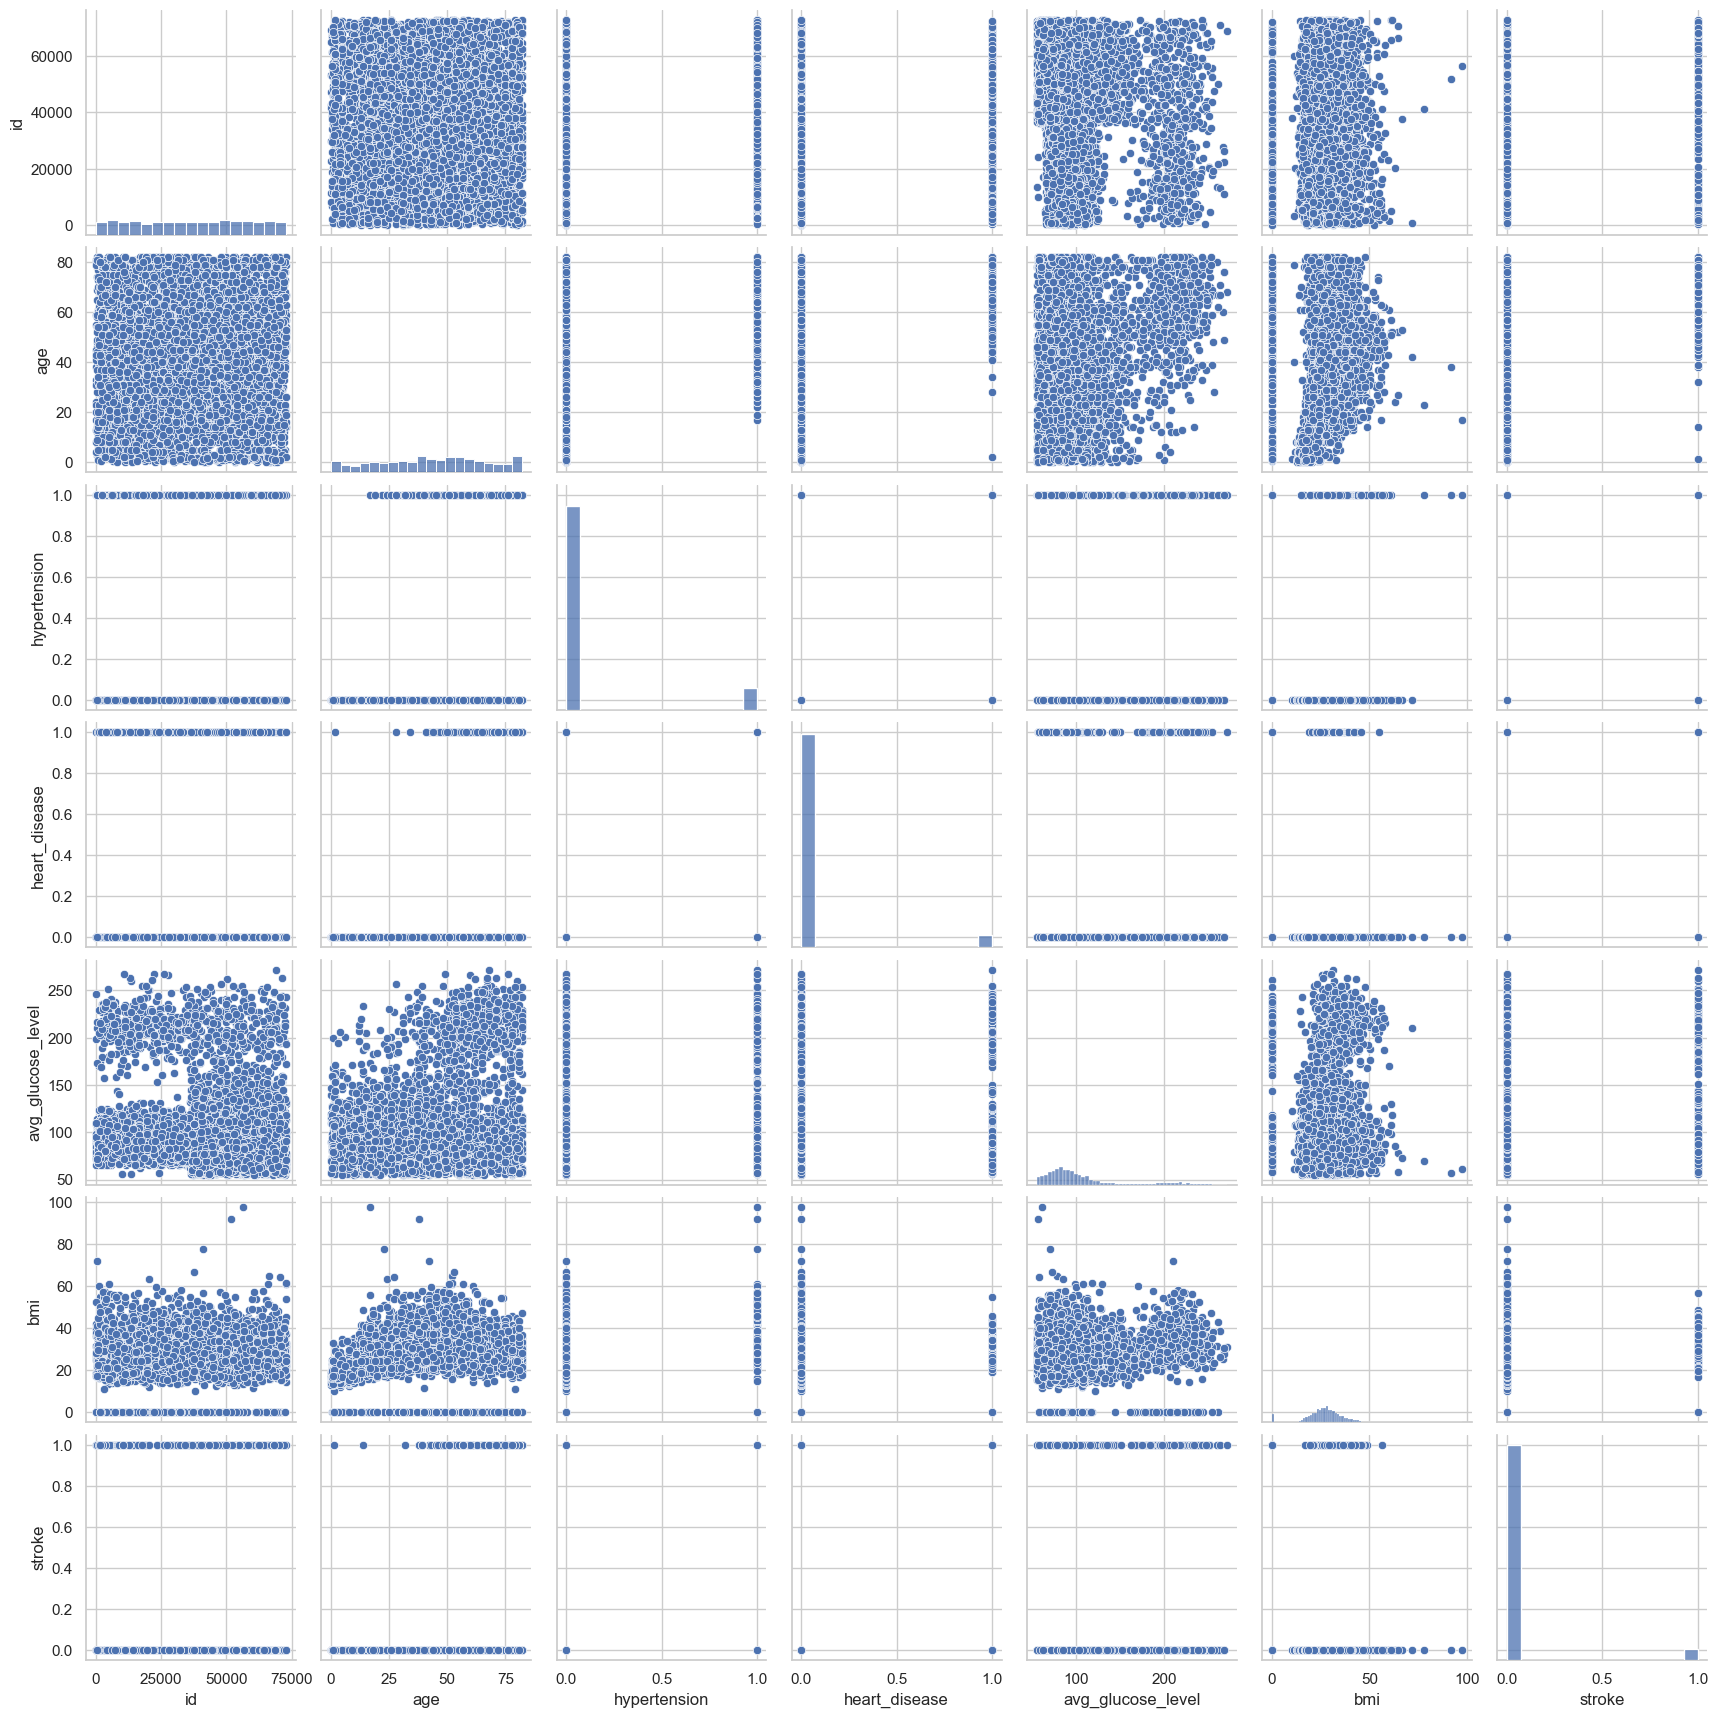

In [62]:
sb.pairplot(h)

C:\Users\acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` var

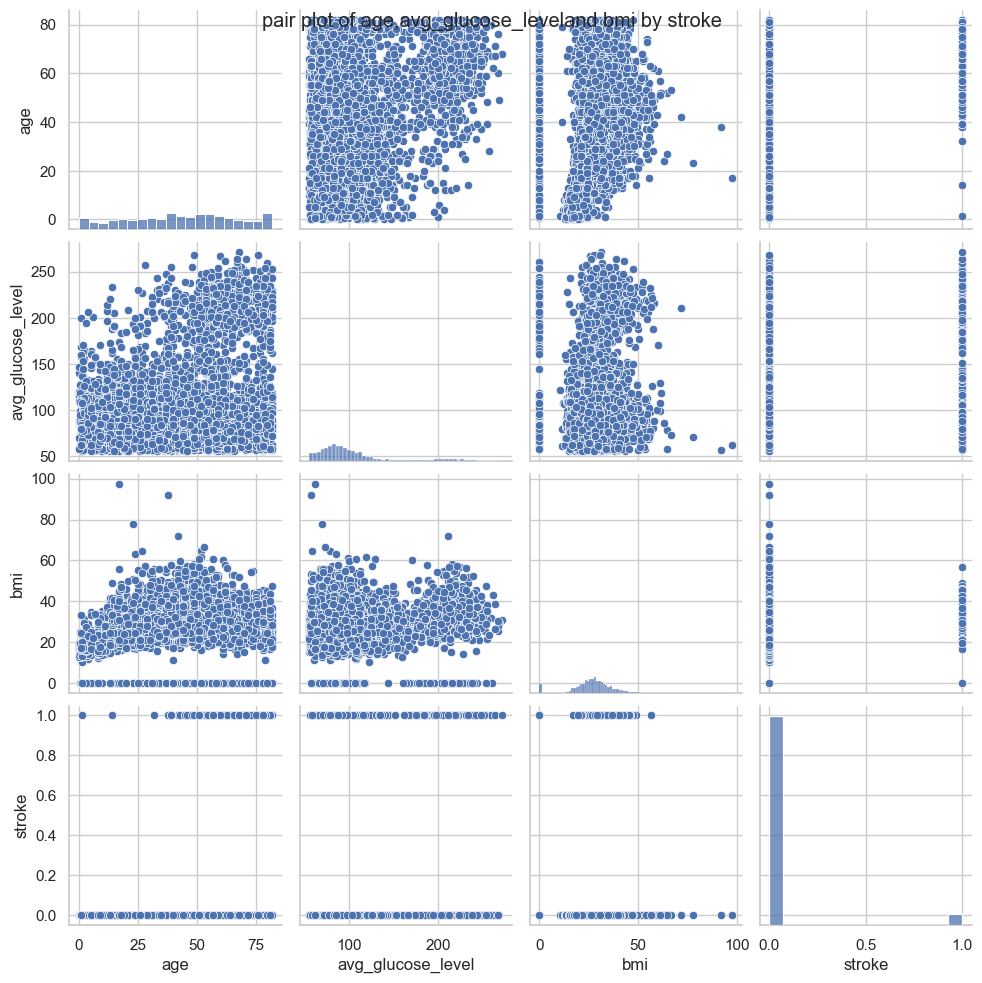

In [63]:

sb.pairplot(h[['age','avg_glucose_level','bmi','stroke']],palette='cool')
plt.suptitle('pair plot of age,avg_glucose_leveland bmi by stroke')
plt.xticks(rotation=90)
plt.show()

Text(0, 0.5, 'age')

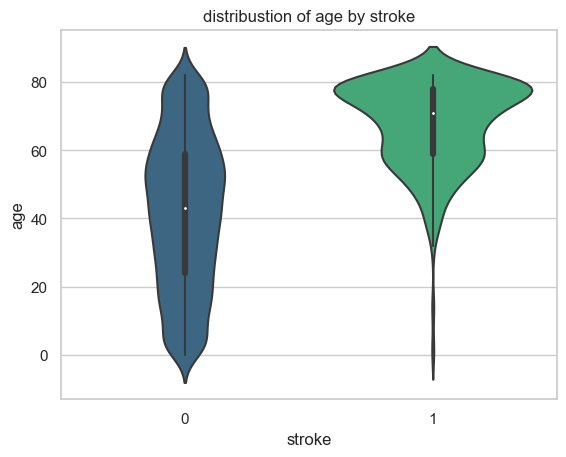

In [64]:
sb.violinplot(h,x='stroke',y='age',palette='viridis')
plt.title('distribustion of age by stroke')
plt.xlabel('stroke')
plt.ylabel('age')

Text(0, 0.5, 'avg glucose level')

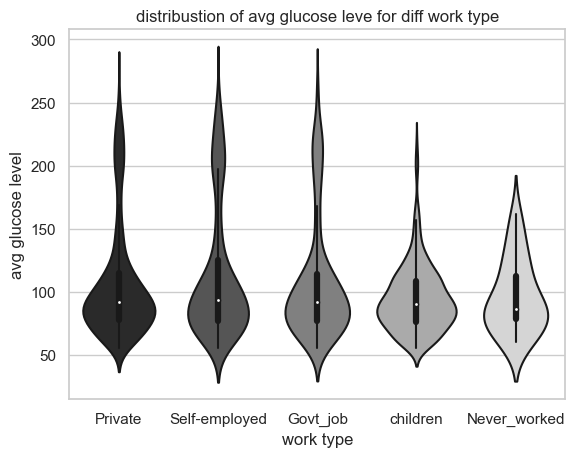

In [65]:
sb.violinplot(h,x='work_type',y='avg_glucose_level',palette='gist_yarg_r')
plt.title('distribustion of avg glucose leve for diff work type')
plt.xlabel('work type')
plt.ylabel('avg glucose level')

Text(0.5, 1.0, 'proportion of each gender in dataset')

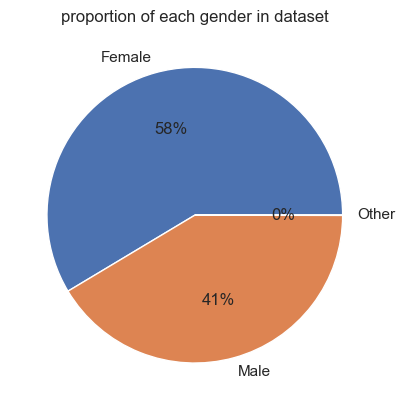

In [66]:
gender_count=h['gender'].value_counts()
plt.pie(gender_count,labels=gender_count.index,autopct='%d%%')
plt.title('proportion of each gender in dataset')

Text(0.5, 1.0, 'distribution of residence type in dataset')

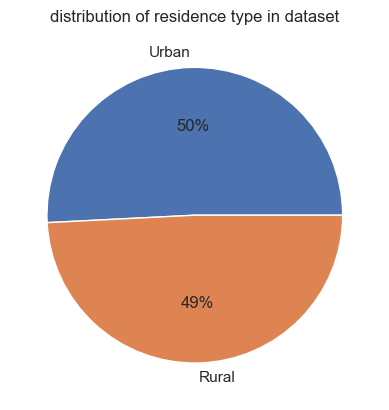

In [67]:
Residenct=h['Residence_type'].value_counts()
plt.pie(Residenct,labels=Residenct.index,autopct='%d%%')
plt.title('distribution of residence type in dataset')

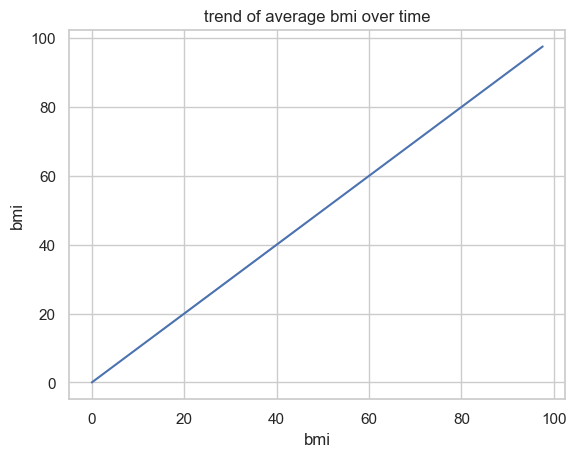

In [68]:
#h['checkup_date']=pd.to_datetime(h['checkup_date'])
#h.set_index('checkup_date',inplace=True)
#avg_bmi=h.groupby(pd.(freq='M'))['bmi'].mean()
sb.lineplot(x=h.bmi,y=h.bmi)
plt.title('trend of average bmi over time')
#plt.xlabel('year')
#plt.ylabel('avg bmi')
plt.grid(True)

Text(0.5, 1.0, 'avg glucose level over stroke')

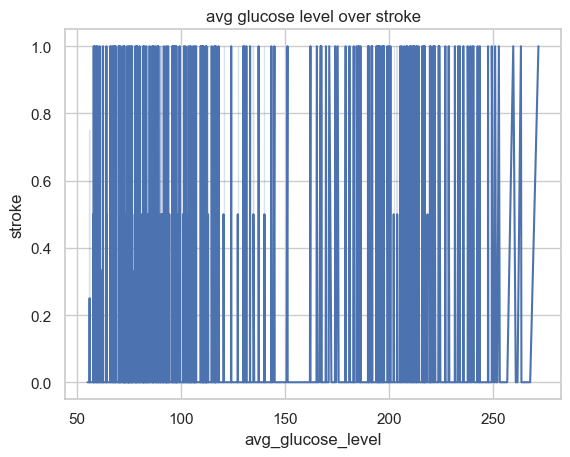

In [72]:
sb.lineplot(x=h.avg_glucose_level,y=h.stroke)
plt.title('avg glucose level over stroke')

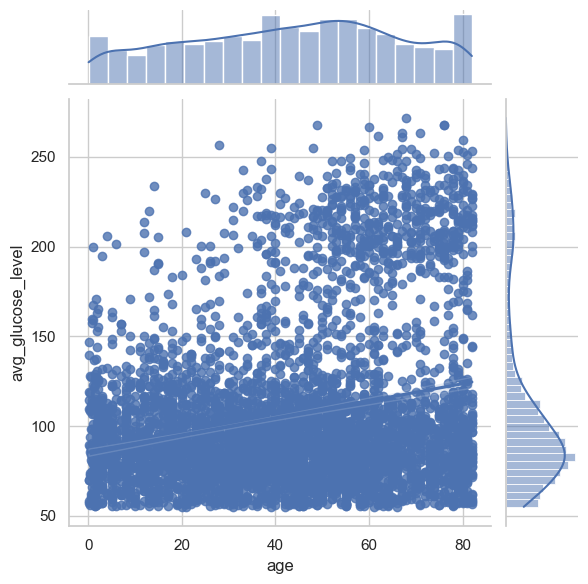

In [73]:
sb.jointplot(x=h.age,y=h.avg_glucose_level,kind='reg')

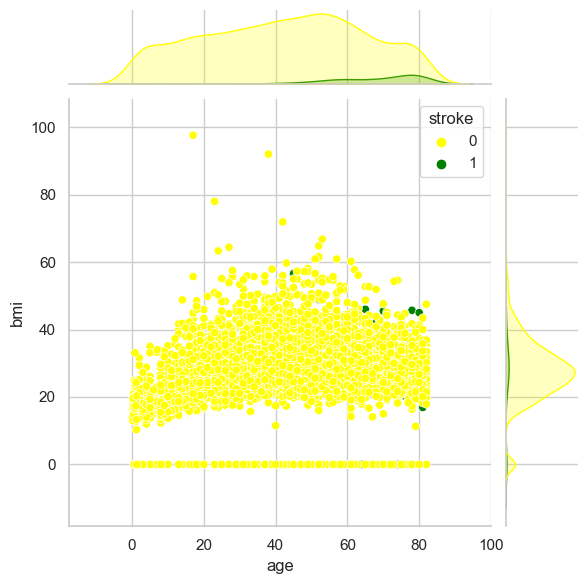

In [74]:
sb.jointplot(x=h.age,y=h.bmi,hue=h.stroke,palette=['yellow','green'])

data preprosesing for converting catagirical into numeric pd.get_dumies
            pd.get_dumies(['gender','ever_married','work_type'])

In [70]:
 pd.get_dummies(['gender','ever_married','work_type','Residence_type'])

,Residence_type,ever_married,gender,work_type
0,False,False,True,False
1,False,True,False,False
2,False,False,False,True
3,True,False,False,False


sb.heatmap(cor,annot=True,cmap='blue',fmt='.3f')

lambda func--lambda contains individul format where we can define the series 
aggfunc=lambda stroke:stroke.sum()*100/100